In [1]:
import pandas as pd


In [2]:
df=pd.read_excel('/content/heart_disease.xlsx', sheet_name='Heart_disease')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [6]:
numeric_data=df.select_dtypes(include=['int64','float64']).columns

In [7]:
print(numeric_data)

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num'], dtype='object')


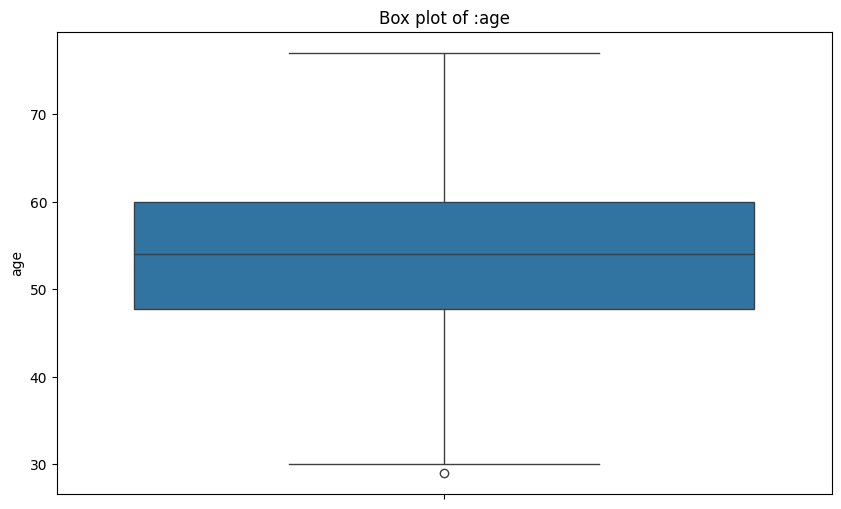

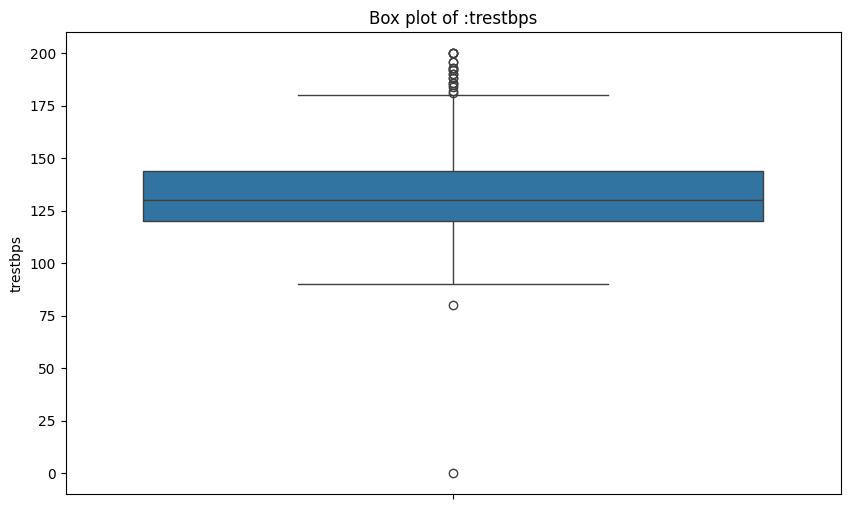

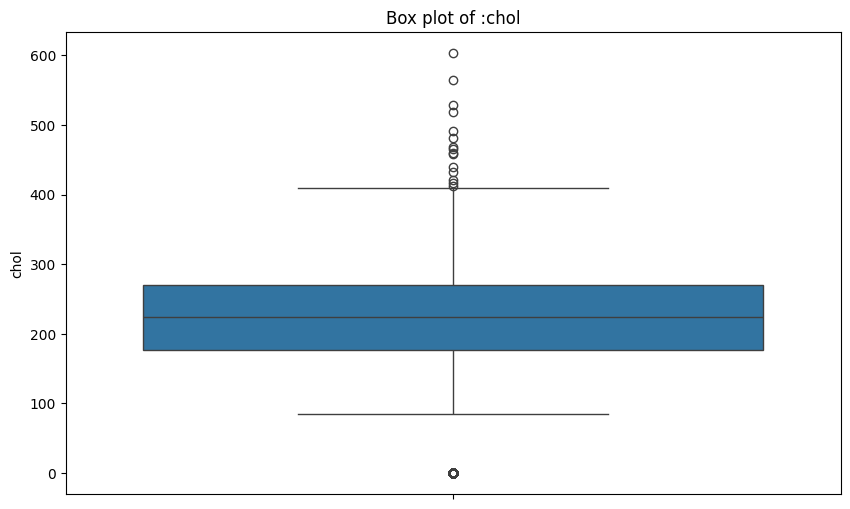

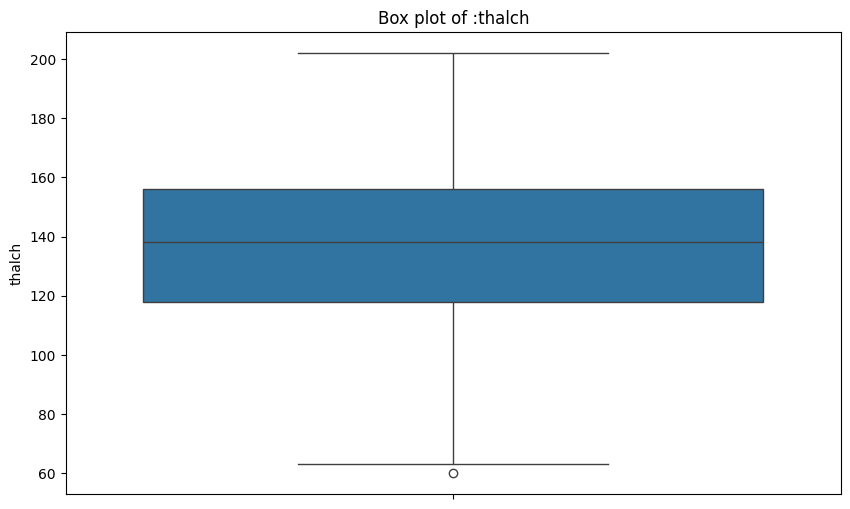

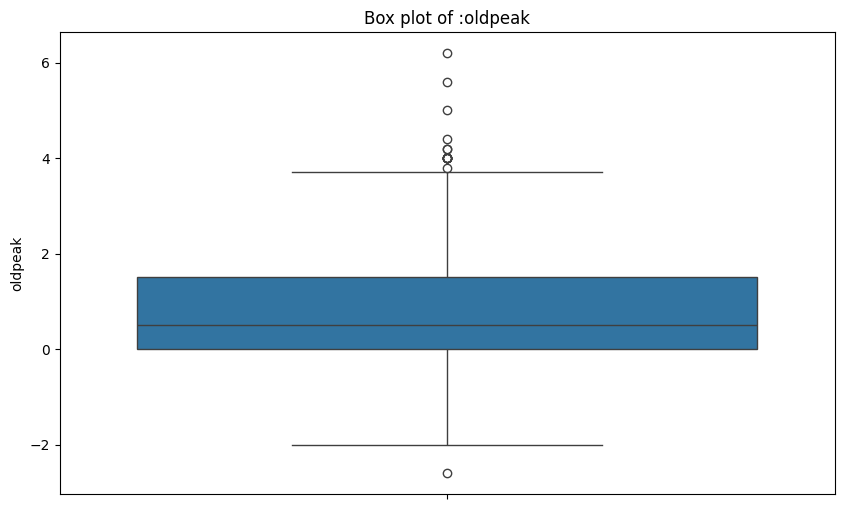

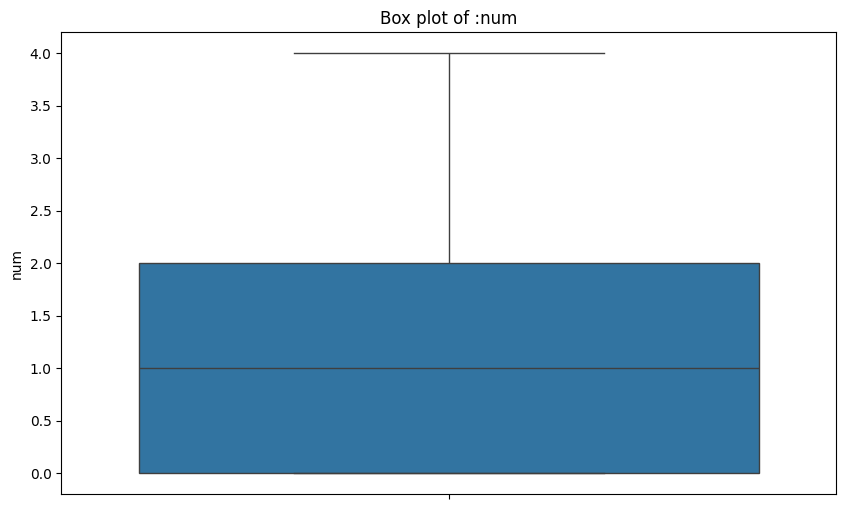

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in numeric_data:
  plt.figure(figsize=(10,6))
  sns.boxplot(df[col])
  plt.title('Box plot of :' +col)
  plt.show()

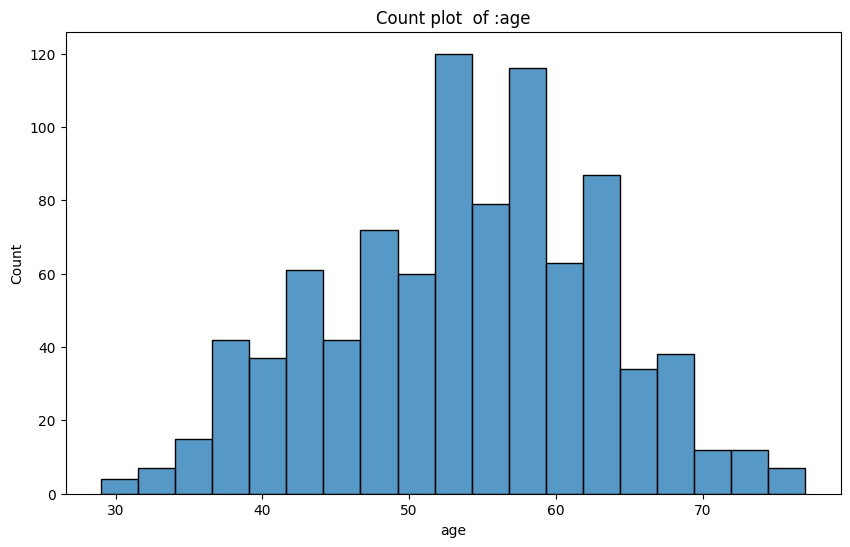

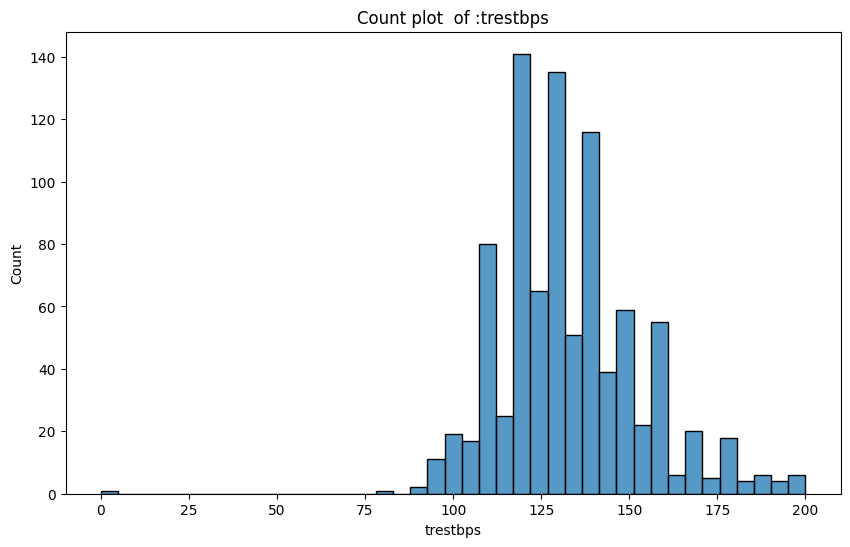

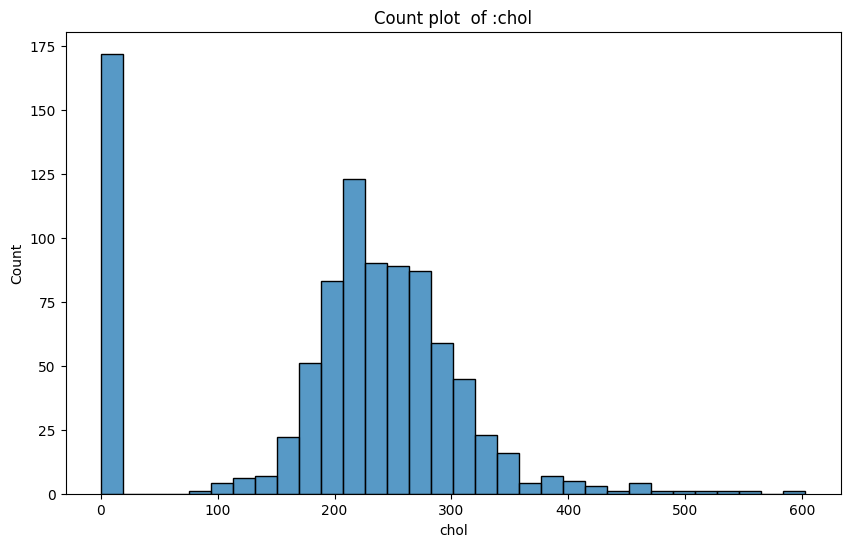

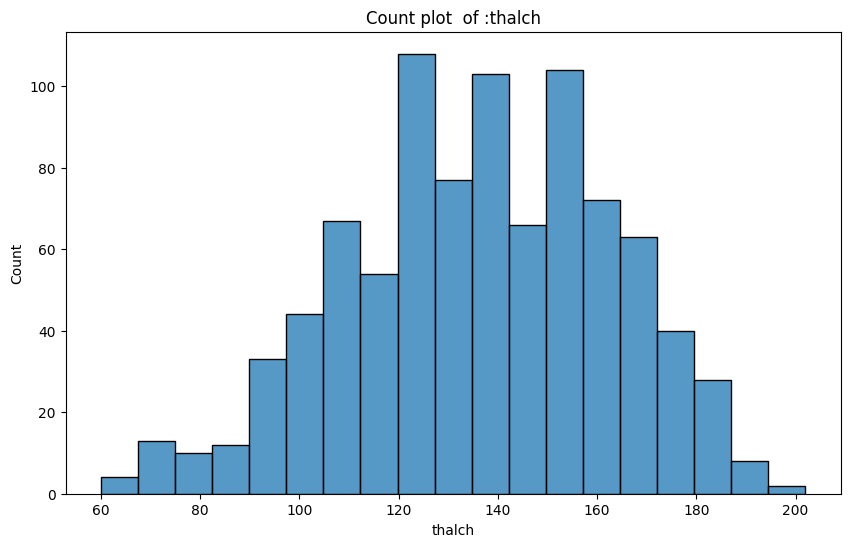

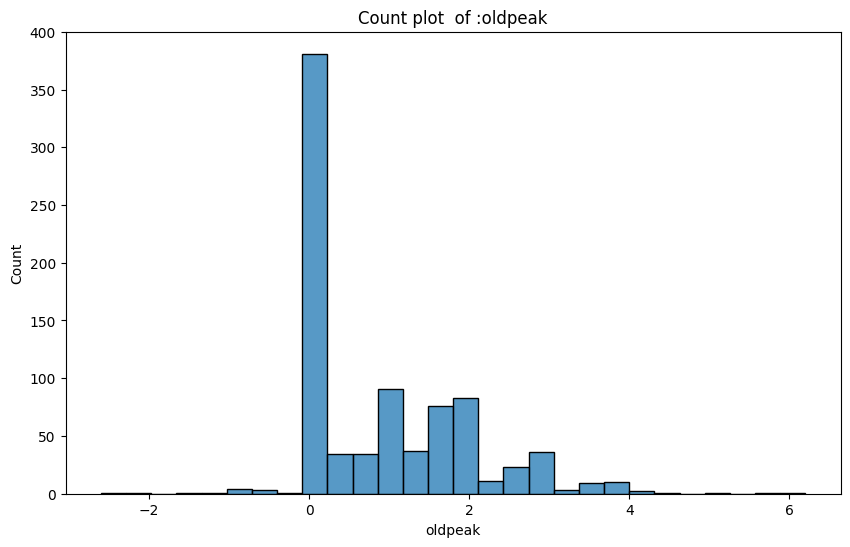

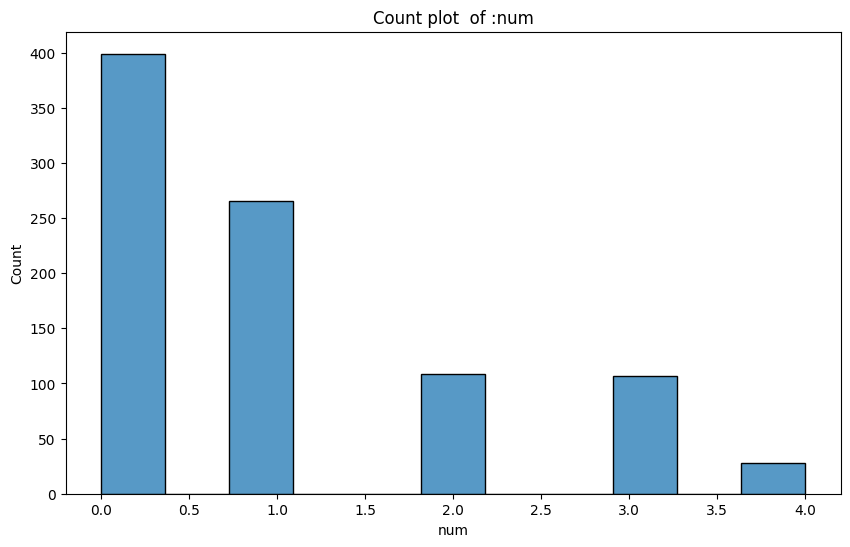

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in numeric_data:
  plt.figure(figsize=(10,6))
  sns.histplot(df[col])
  plt.title('Count plot  of :' +col)
  plt.show()

In [10]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [11]:
df['oldpeak'].value_counts()

oldpeak
 0.0    358
 1.0     83
 2.0     76
 1.5     48
 3.0     28
 0.5     19
 1.2     17
 2.5     16
 1.4     15
 0.8     15
 0.6     14
 1.6     14
 0.2     14
 1.8     12
 0.4     10
 0.1      9
 4.0      8
 2.8      7
 2.6      7
 0.7      5
 1.9      5
 1.3      5
 2.2      5
 0.3      5
 2.4      4
 0.9      4
 1.1      4
 3.6      4
 3.4      3
-1.0      2
 3.2      2
 2.3      2
-0.5      2
 4.2      2
 2.1      2
 3.5      2
 1.7      2
-2.0      1
 4.4      1
 3.7      1
 2.9      1
 5.6      1
 6.2      1
-0.7      1
 3.1      1
-0.1      1
 5.0      1
-1.1      1
-0.8      1
-2.6      1
-0.9      1
-1.5      1
 3.8      1
Name: count, dtype: int64

In [12]:
df['oldpeak']=df['oldpeak'].fillna(df['oldpeak'].mean())


In [13]:
df['oldpeak'].isnull().sum()

0

we replaced null values with mean so that valuable data is not removed . If it contains less variables i could have removed those but these are 62 .So we replaced it with the mean of the old peak values

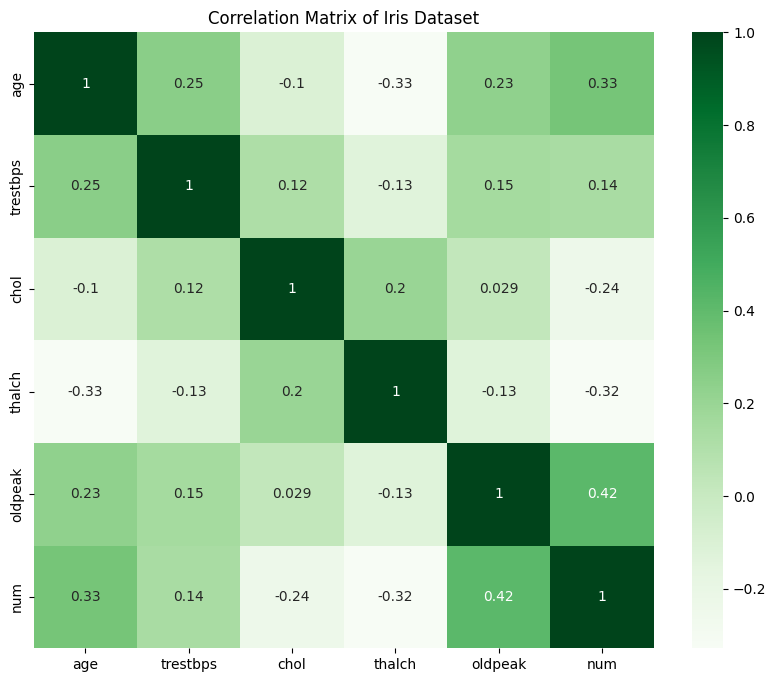

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd

correlation_matrix = df[numeric_data].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="Greens", annot=True)
plt.title("Correlation Matrix of Iris Dataset")
plt.show()



Feature Engineering

We handled missing values above

In [15]:
categ_data=df.select_dtypes(include=['object']).columns
print(categ_data)

Index(['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'], dtype='object')


In [16]:
for col in categ_data:
  print(df[col].value_counts())

sex
Male      718
Female    190
Name: count, dtype: int64
cp
asymptomatic       495
non-anginal        203
atypical angina    165
typical angina      45
Name: count, dtype: int64
restecg
normal              542
lv hypertrophy      187
st-t abnormality    179
Name: count, dtype: int64
exang
False    516
True     337
TURE      36
FALSE     19
Name: count, dtype: int64
slope
flat           453
upsloping      298
downsloping    157
Name: count, dtype: int64
thal
normal               386
reversable defect    346
fixed defect         176
Name: count, dtype: int64


In [17]:
df['sex']=df['sex'].replace(['Male','Female'],[0,1])

In [18]:
df['exang'].unique()

array([False, True, 'FALSE', 'TURE'], dtype=object)

In [19]:
df['slope']=df['slope'].replace(['Up','Flat','Down'],[0,1,2])

In [20]:
df['slope'].head()

0    downsloping
1           flat
2           flat
3           flat
4           flat
Name: slope, dtype: object

In [24]:
categ_col=df.select_dtypes(include=['object']).columns

In [25]:
df[categ_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   cp       908 non-null    object
 1   restecg  908 non-null    object
 2   exang    908 non-null    object
 3   slope    908 non-null    object
 4   thal     908 non-null    object
dtypes: object(5)
memory usage: 35.6+ KB


In [26]:
df[categ_col].isnull().sum()

cp         0
restecg    0
exang      0
slope      0
thal       0
dtype: int64

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in categ_col:
  if df[col].dtype=='object':
    df[col]=df[col].astype(str)
  df[col]=le.fit_transform(df[col])
print(df[categ_col])


     cp  restecg  exang  slope  thal
0     3        0      1      0     0
1     1        1      1      1     0
2     0        1      1      1     0
3     3        0      1      1     0
4     0        1      3      1     0
..   ..      ...    ...    ...   ...
903   0        1      1      2     2
904   0        2      3      1     2
905   2        0      3      0     1
906   2        2      2      0     0
907   0        2      0      1     2

[908 rows x 5 columns]


In [28]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,0,3,145,233,True,0,150,1,2.3,0,0,0
1,41,0,1,135,203,False,1,132,1,0.0,1,0,0
2,57,0,0,140,192,False,1,148,1,0.4,1,0,0
3,52,0,3,118,186,False,0,190,1,0.0,1,0,0
4,57,0,0,110,201,False,1,126,3,1.5,1,0,0


In [30]:
df['fbs'].head()

0     True
1    False
2    False
3    False
4    False
Name: fbs, dtype: bool

In [31]:
df['fbs']=df['fbs'].astype(int)
print(df['fbs'].head())

0    1
1    0
2    0
3    0
4    0
Name: fbs, dtype: int64


In [32]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,0,3,145,233,1,0,150,1,2.3,0,0,0
1,41,0,1,135,203,0,1,132,1,0.0,1,0,0
2,57,0,0,140,192,0,1,148,1,0.4,1,0,0
3,52,0,3,118,186,0,0,190,1,0.0,1,0,0
4,57,0,0,110,201,0,1,126,3,1.5,1,0,0


This is the preprocessed data after removing null values , encoding categorical data . We can train our model well

In [35]:
from sklearn.model_selection import train_test_split
X=df[['age','cp','chol','thalch']]
y=df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train:")
print(X_train)
print("\nX_test:")
print(X_test)
print("\ny_train:")
print(y_train)
print("\ny_test:")
print(y_test)


X_train:
     age  cp  chol  thalch
84    42   1   295     162
10    30   3   237     170
617   74   2   237      94
250   41   0     0     111
869   49   2   142      68
..   ...  ..   ...     ...
106   63   2   252     172
270   37   1   260     130
860   48   0   374     159
435   57   1   232     164
102   60   3   240     171

[726 rows x 4 columns]

X_test:
     age  cp  chol  thalch
865   63   2     0     111
439   58   0     0     105
342   41   1   291     160
736   61   0   241     148
785   54   0   206     108
..   ...  ..   ...     ...
580   52   0   266     134
868   65   0   312     156
445   53   0   203     155
786   54   0   286     116
25    45   1   160     138

[182 rows x 4 columns]

y_train:
84     0
10     0
617    1
250    0
869    3
      ..
106    0
270    0
860    3
435    1
102    0
Name: num, Length: 726, dtype: int64

y_test:
865    3
439    1
342    0
736    2
785    3
      ..
580    1
868    3
445    1
786    3
25     0
Name: num, Length: 182, dtype: i

In [36]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth =3, random_state = 42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

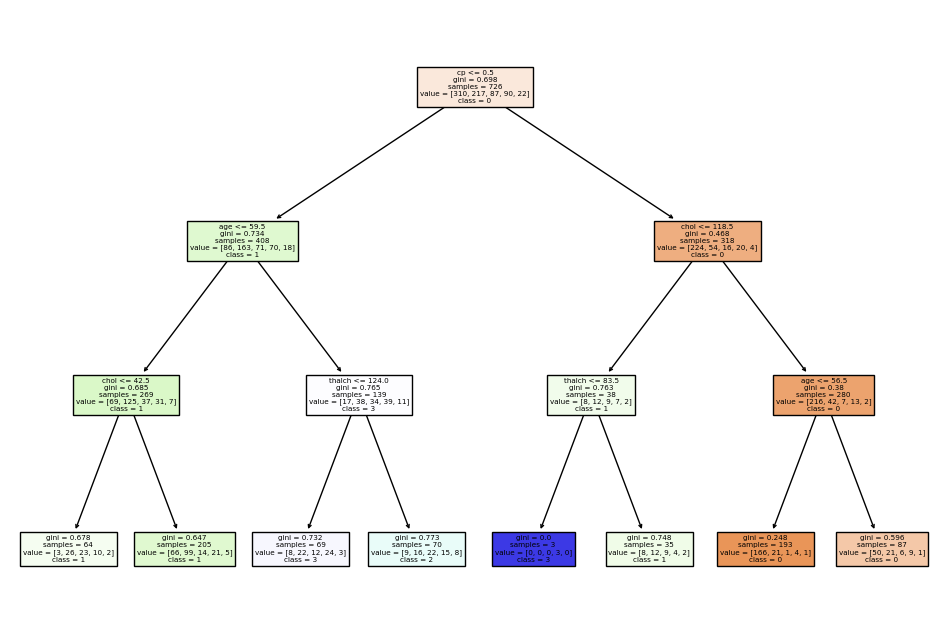

In [39]:
from sklearn import tree
import matplotlib.pyplot as plt
class_names = [str(c) for c in clf.classes_]
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=X.columns, class_names=class_names, filled=True)
plt.show()

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
y_pred=clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred , average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.554945054945055
Precision: 0.3427307726743665
Recall: 0.3320457549720603
F1 Score: 0.3281024716761393


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Hyper parameter tuning

In [45]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth' :[1,2,3,4,5],
    'min_samples_split' :[2,3,4],
    'min_samples_leaf' :[1,2,3]
}
grid_search=GridSearchCV(clf,param_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train,y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Test Set Accuracy: {accuracy}")


Best Hyperparameters: {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Set Accuracy: 0.5824175824175825


After changing the hyperparameters we can find little change in accuracy , Grid search finds the best parameters for the model , we took scoring as accuracy .